In [1]:
import pandas as pd
import numpy as np

In [7]:
# Read Data

header = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak',
         'slope','ca','thal','num']

data =  pd.read_csv('../dataset/processed.cleveland.data', 
                    sep=",",
                    names=header)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [26]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [27]:
data['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Understanding Data

In [12]:
import seaborn as sns

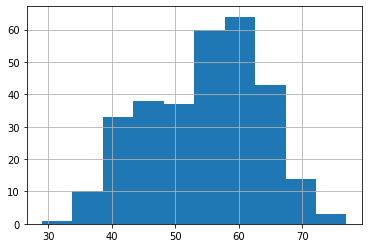

In [11]:
# Age

data['age'].hist()

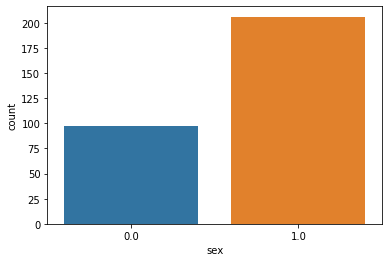

In [13]:
# Sex

sns.countplot(data=data, x='sex')

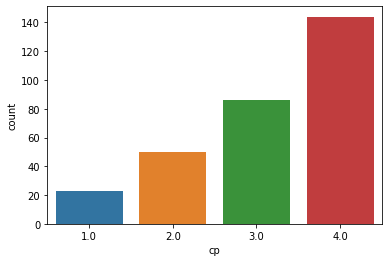

In [14]:
# cp

sns.countplot(data=data, x='cp')

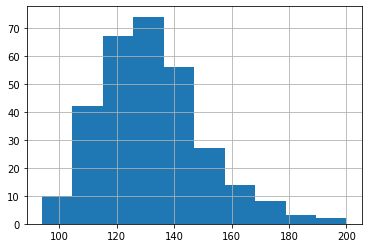

In [15]:
# trestbps

data['trestbps'].hist()

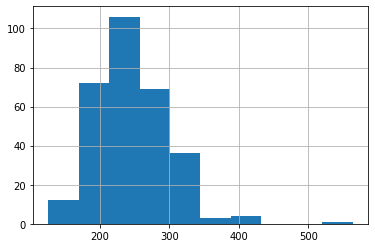

In [16]:
# chol

data['chol'].hist()

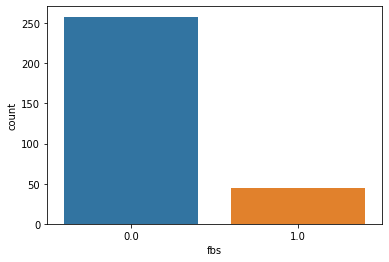

In [18]:
# fbs

sns.countplot(data=data, x='fbs')

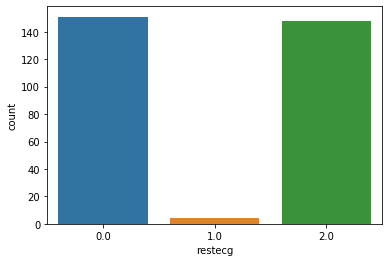

In [19]:
# restecg

sns.countplot(data=data, x='restecg')

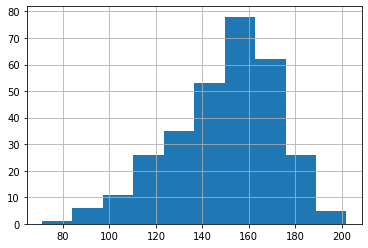

In [20]:
# thalach

data['thalach'].hist()

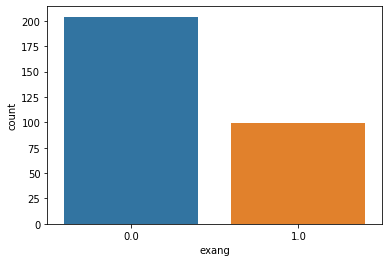

In [21]:
# exang

sns.countplot(data=data, x='exang')

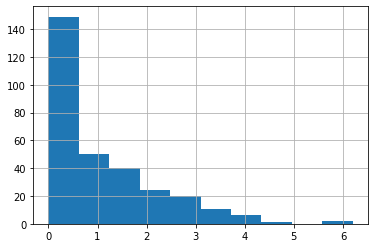

In [22]:
# oldpeak

data['oldpeak'].hist()

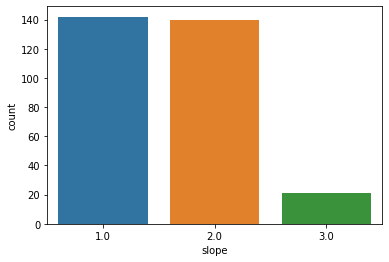

In [23]:
# slope

sns.countplot(data=data, x='slope')

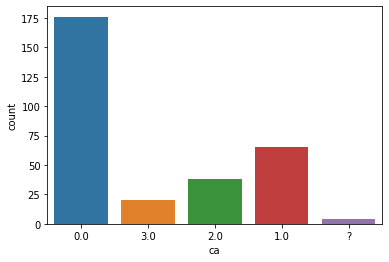

In [28]:
# cha

sns.countplot(data=data, x='ca')

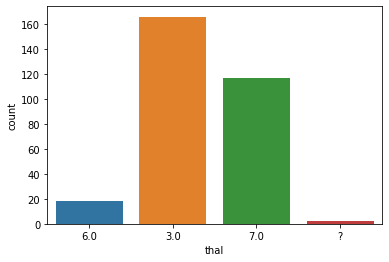

In [29]:
# thal

sns.countplot(data=data, x='thal')

# Data Preparation

Drop ca and thal with ? values

In [30]:
data.drop(data[data['ca'] == '?'].index, inplace = True)
data.drop(data[data['thal'] == '?'].index, inplace = True)

In [32]:
data.shape

(297, 14)

In [33]:
data['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [34]:
data['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [40]:
data['ca'] = pd.to_numeric(data['ca'])

In [41]:
data['thal'] = pd.to_numeric(data['thal'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


# Correlation to Target

In [48]:
import matplotlib.pyplot as plt

In [54]:
# Split categorical and numerical variable

cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
cont = ['age','trestbps','chol','thalach','oldpeak','num']

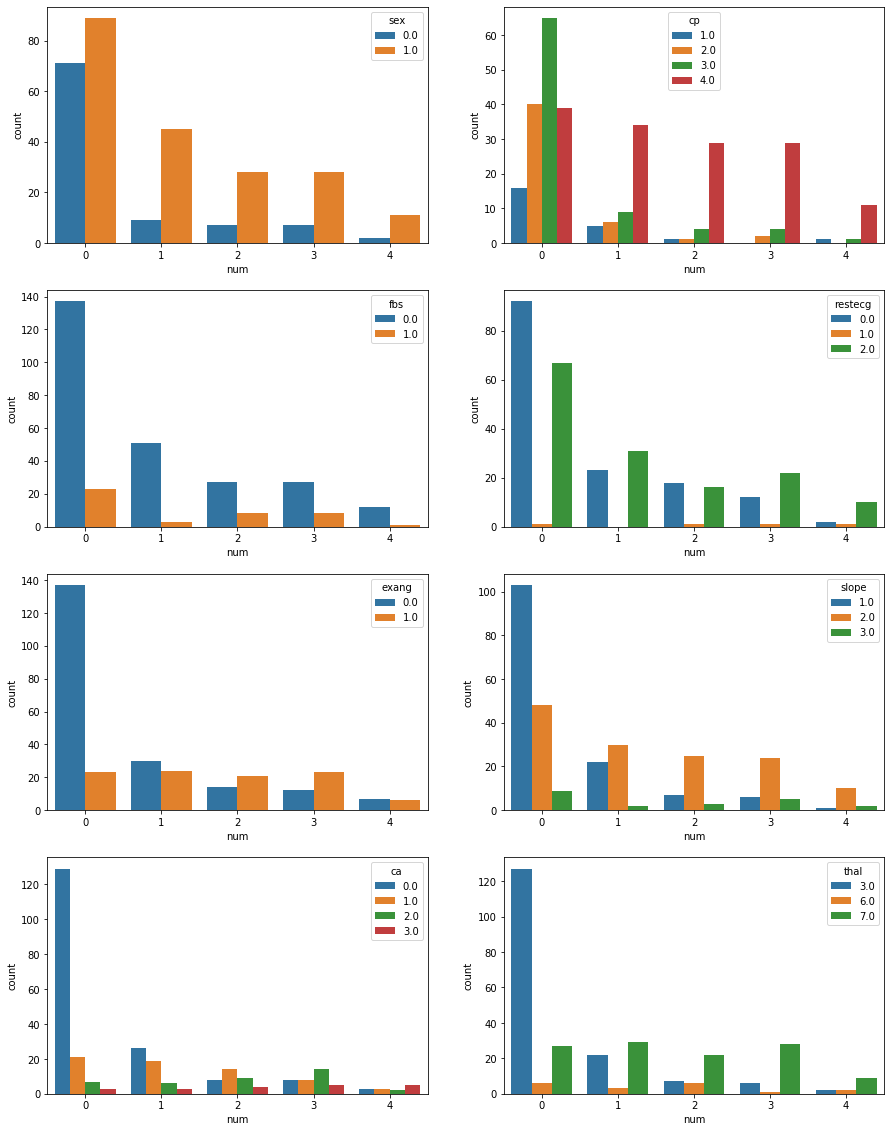

In [53]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for var, subplot in zip(cat, ax.flatten()):
    sns.countplot(data=data, x='num', hue=var, ax=subplot)

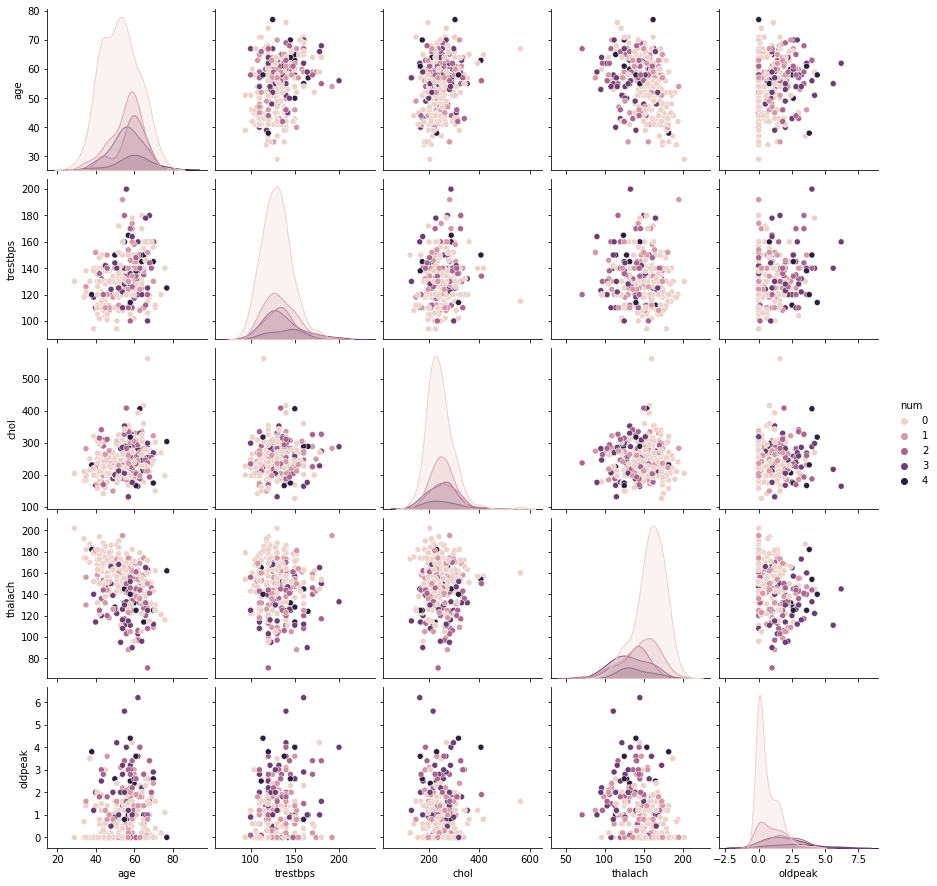

In [57]:
sns.pairplot(data=data[cont], hue='num')

# Model

## Base Model - SVM

In [97]:
from sklearn.model_selection import train_test_split

X = data.drop(['num'], axis = 1)
y = data['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape

((237, 13), (60, 13))

In [99]:
y_train.shape, y_test.shape

((237,), (60,))

In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf',gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        36
           1       0.14      0.11      0.12         9
           2       0.25      0.20      0.22         5
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.29      0.29      0.28        60
weighted avg       0.55      0.65      0.59        60



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4
0,36,0,0,0,0
1,4,1,3,1,0
2,1,1,1,2,0
3,2,4,0,1,0
4,2,1,0,0,0


# Deep Learning - NN

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [102]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [103]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [105]:
y_test[:5]

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Epoch 500

In [120]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    
    # define model
    model = Sequential()
    model.add(Dense(10, input_shape=(13,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

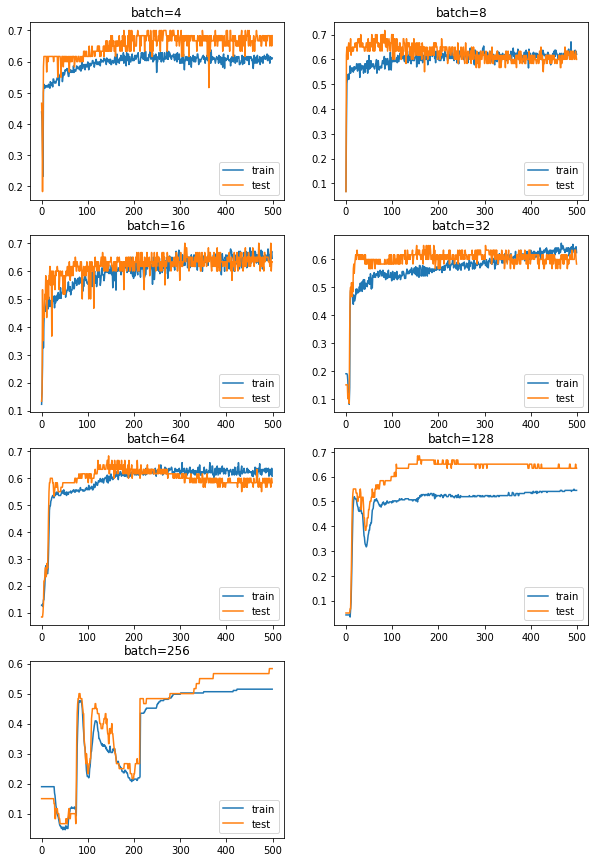

In [121]:
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()

# Epoch 1000

In [122]:
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    
    # define model
    model = Sequential()
    model.add(Dense(10, input_shape=(13,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

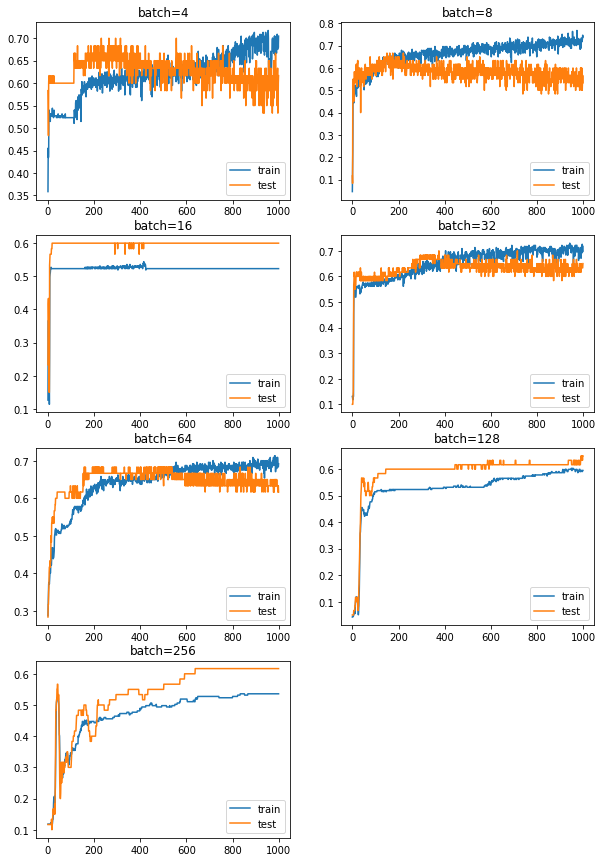

In [123]:
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()